<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/Prueba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

Lectura d edatos que almacenan por país las tasas de fecundidad adolescente (número de nacimientos por cada 1.000 mujeres de 15 a 19 años) y mortalidad de menores de 5 años (probabilidad por cada 1.000 de que un bebé recién nacido muera antes de cumplir los
cinco años) desde 1960.

In [ ]:
adolescent_fertility=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/AdolescentFertility.csv')
adolescent_fertility.head()
mortality=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/Mortality.csv')
mortality.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,344.6,338.7,333.1,327.6,322.0,316.8,...,87.6,83.9,80.3,76.8,73.6,70.4,67.6,64.9,62.5,60.3
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.3,112.3,105.0,98.6,93.0,88.2,84.2,80.6,77.7,74.7
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.2,12.1,11.2,10.4,9.9,9.6,9.4,9.4,9.5,9.7
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.1,3.9,3.7,3.5,3.4,3.2,3.1,3.0


2. A partir de los dataframes anteriores obtén uno donde sólo almacenes la información de México. Haz los cambios necesarios para que quede con la siguiente estructura.

In [ ]:
mexico = pd.concat([adolescent_fertility[adolescent_fertility['Country Name']=='Mexico'], mortality[mortality['Country Name']=='Mexico']], axis=0)
mexico.drop(['Country Name','Country Code'],axis=1,inplace=True)
mexico = mexico.T
mexico.index.name = 'Year'
mexico.columns.name = ''
mexico.columns = ['Adolescent Fertility','Mortality']
mexico

,Adolescent Fertility,Mortality
Year,,
1960,116.4508,155.8
1961,116.6804,149.3
1962,116.9100,143.3
1963,116.9100,137.9
...,...,...
2016,61.4860,15.7
2017,60.3650,15.2
2018,59.4542,14.7
2019,58.5434,14.2


3. Gráficando con el uso de Pandas:

<Axes: xlabel='Year'>

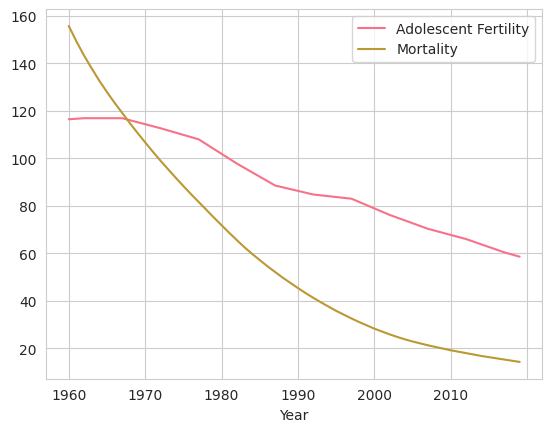

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('husl')
mexico.plot()

4. Usando nuevamente los dataframes adolescent_fertility y mortality, obtén la información de
ambos índices para los países de Norteamérica, en el 2019. Haz los cambios necesarios para
que quede con la siguiente estructura:

In [ ]:
north_america = pd.concat([adolescent_fertility[['Country Code','2019']],mortality['2019']],axis=1)
north_america.columns = ['Country Code','Adolescent Fertility','Mortality']
north_america = north_america[north_america['Country Code'].isin(['MEX','USA','CAN'])]
north_america.set_index('Country Code',inplace=True)
north_america

,Adolescent Fertility,Mortality
Country Code,,
CAN,7.6822,4.9
MEX,58.5434,14.2
USA,17.2524,6.5


5. Visualiza el dataframe anterior en un gráfico de barras, ocupando la plataforma Pandas. Personaliza
sus propiedades para que se vea de la siguiente manera:

<Axes: title={'center': 'Norte America 2019'}, xlabel='Country Code', ylabel='Rate x 1000'>

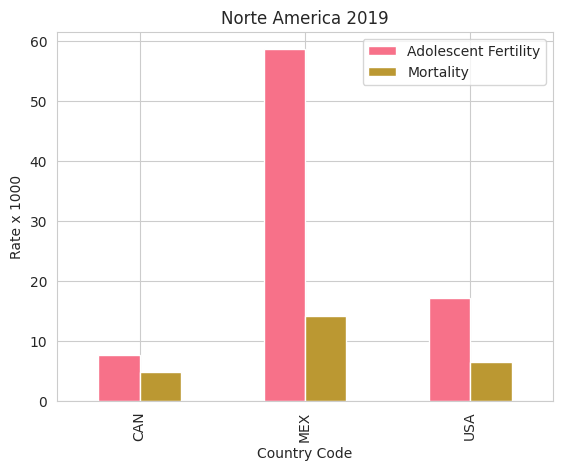

In [13]:
north_america.plot.bar(title='Norte America 2019', ylabel='Rate x 1000')

6. Para observar la distribución de ambos indicadores en el mundo, para el 2019, construye un gráfico
de histogramas independientes utilizando Matplotlib. Utiliza 5 bins y transparencia de 0.5.

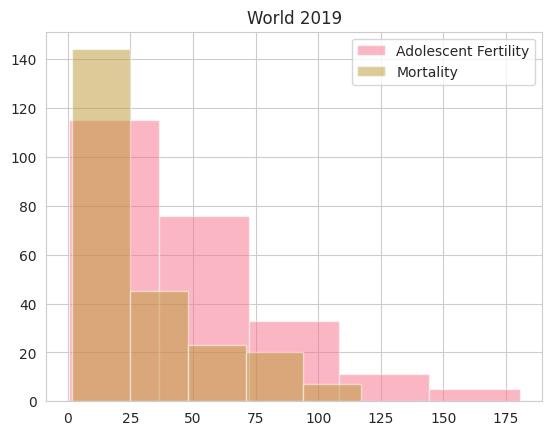

In [14]:
plt.hist('2019',data=adolescent_fertility,label='Adolescent Fertility',bins=5,alpha=0.5)
plt.hist('2019',data=mortality,label='Mortality',bins=5,alpha=0.5)
plt.title('World 2019')
plt.legend()


7. ¿Cómo han cambiado estos índices en la última década? Compáralos con boxplots en los
años 2009 y 2019.

<Axes: title={'center': 'World Adolescent Fertility'}, ylabel='Rate x 1000'>

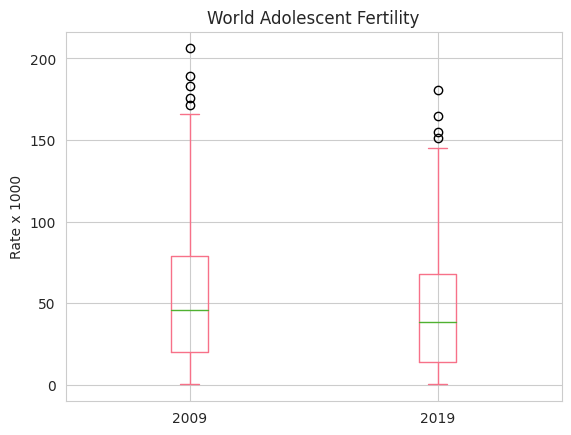

In [15]:
adolescent_fertility[['2009','2019']].plot.box(title='World Adolescent Fertility',ylabel='Rate x 1000')

<Axes: title={'center': 'World Mortality'}, ylabel='Rate x 1000'>

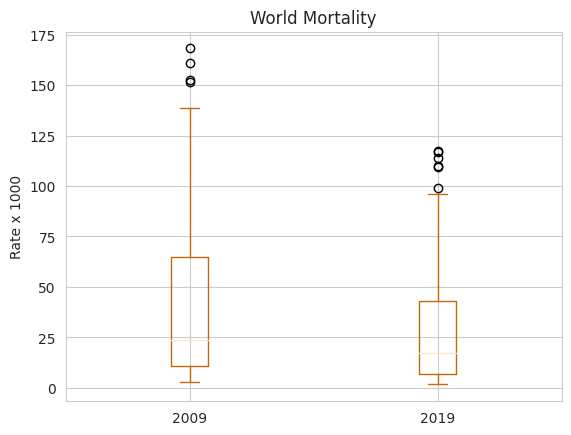

In [16]:
sns.set_palette('PuOr')
mortality[['2009','2019']].plot.box(title='World Mortality',ylabel='Rate x 1000')

8. Emplea la plataforma Seaborn para graficar la relación entre las dos tasas en el 2019. También
obtén el índice de correlación numérico para cuantificar la dependencia entre ambas variables.

0.7860446246960763


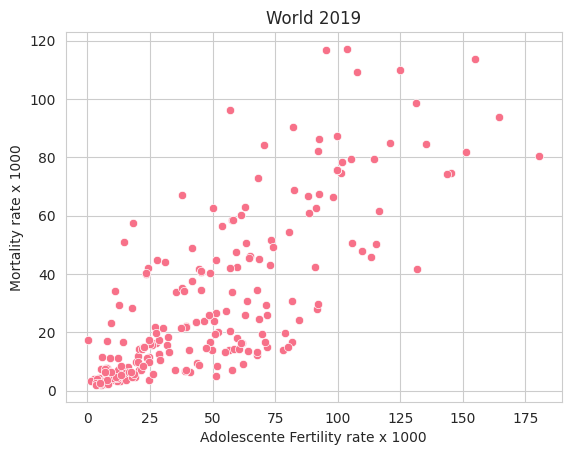

In [19]:
sns.set_palette('husl')
sns.scatterplot(x=adolescent_fertility['2019'],y=mortality['2019'])
plt.title('World 2019')
plt.xlabel('Adolescente Fertility rate x 1000')
plt.ylabel('Mortality rate x 1000')
corr = adolescent_fertility['2019'].corr(mortality['2019'])
print(corr)